In [3]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore') # 実行に影響のない　warninig　を非表示にします. 非推奨.

wine = pd.read_csv("./winequality-red.csv", sep=";") # sepは区切り文字の指定
display(wine.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
X = wine[["density"]].values
T = wine["alcohol"].values

X = X - X.mean()
T = T - T.mean()

X_train = X[:1000, :]
T_train = T[:1000]
X_test = X[1000:, :]
T_test = T[1000:]

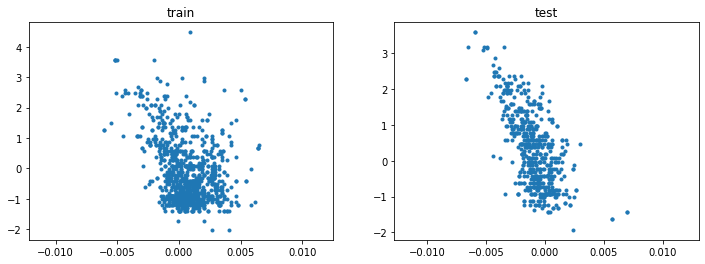

In [5]:
%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].scatter(X_train, T_train, marker=".")
axes[0].set_title("train")
axes[1].scatter(X_test, T_test, marker=".")
axes[1].set_title("test")
fig.show()

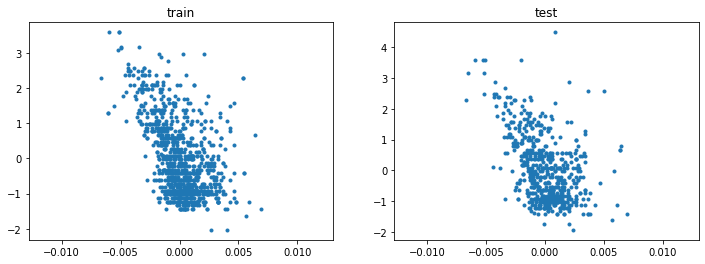

In [19]:
import numpy as np
np.random.seed(0) # random　の挙動を固定

p = np.random.permutation(len(X)) # random　な　index のリスト
X = X[p]
T = T[p]

X_train = X[:1000, :]
T_train = T[:1000]
X_test = X[1000:, :]
T_test = T[1000:]

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].scatter(X_train, T_train, marker=".")
axes[0].set_title("train")
axes[1].scatter(X_test, T_test, marker=".")
axes[1].set_title("test")
fig.show()

In [42]:
class MyLinearRegression(object):
    def __init__(self, a=None, b=None):
        self.a = a
        self.b = b
        
    def fit(self, X, y):
        """
        X: data, array-like, shape (n_samples, n_features)
        y: array, shape (n_samples,)
        Estimate a coefficient and an intercept　from data.
        """
        
        
        return self
    
    def predict(self, X):
        """
        Calc y from X
        """
        y = b + a*X
        
        return y
    
clf = MyLinearRegression()
clf.fit(X_train, T_train)
# 回帰係数
print("係数: ", clf.a)
# 切片
print("切片: ", clf.b)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].scatter(X_train, T_train, marker=".")
axes[0].plot(X_train, clf.predict(X_train), color="red")
axes[0].set_title("train")

axes[1].scatter(X_test, T_test, marker=".")
axes[1].plot(X_test, clf.predict(X_test), color="red")
axes[1].set_title("test")
fig.show()

UnboundLocalError: local variable 'regressor' referenced before assignment

係数:  None
切片:  None


NameError: name 'regressor' is not defined

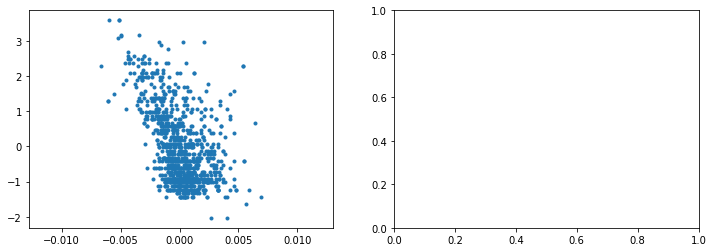

In [41]:
clf = MyLinearRegression()
clf.fit(X_train, T_train)
# 回帰係数
print("係数: ", clf.a)
# 切片
print("切片: ", clf.b)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].scatter(X_train, T_train, marker=".")
axes[0].plot(X_train, clf.predict(X_train), color="red")
axes[0].set_title("train")

axes[1].scatter(X_test, T_test, marker=".")
axes[1].plot(X_test, clf.predict(X_test), color="red")
axes[1].set_title("test")
fig.show()